<a href="https://colab.research.google.com/github/trankhanhduy20146093/PROJECT_AI_CLASSIFICATION_VEHICLE/blob/main/TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder='/content/drive/MyDrive/TRI_TUE_NHAN_TAO/DATASET/'

In [ ]:
#Khai báo các thư viện cần sử dụng
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import cv2

In [ ]:
def remake_images(image):
    remake_images = []

    # Xoay ảnh
    angle = 30  # Góc xoay
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    remake_images.append(rotated_image)

    # Lật ngang ảnh
    flipped_image = cv2.flip(image, 1)
    remake_images.append(flipped_image)

    # Tăng độ sáng ảnh
    brightness_factor = 1.2  # Hệ số tăng độ sáng
    brightened_image = cv2.convertScaleAbs(image, alpha = brightness_factor, beta=0)
    remake_images.append(brightened_image)

    #Làm mờ ảnh
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    remake_images.append(blurred_image)

    return remake_images

In [ ]:
photos,labels = list(),list()
output = 0.0
for file in listdir(folder):
      if file.startswith('ambulance'):
        output=0.0
      if file.startswith('bike'):
        output=1.0
      if file.startswith('bus'):
        output=2.0
      if file.startswith('car'):
        output=3.0
      if file.startswith('firetruck'):
        output=4.0
      if file.startswith('motobike'):
        output=5.0
      if file.startswith('plane'):
        output=6.0
      if file.startswith('ship'):
        output=7.0
      if file.startswith('train'):
        output=8.0
      if file.startswith('truck'):
        output=9.0
      #đọc ảnh gốc
      photo = load_img(folder+file,target_size=(100,100))
      photo = img_to_array(photo)
      #thêm ảnh gốc
      photos.append(photo)
      labels.append(output)
      # Tạo các biến thể của ảnh
      remake_image = remake_images(photo)

      # Thêm các biến thể vào danh sách
      for remake_photo in remake_image:
        photos.append(remake_photo)
        labels.append(output)
 
photos = asarray(photos)
labels = asarray(labels)
print("kich thuoc photos",photos.shape)
print("kich thuoc labels",labels.shape)

kich thuoc photos (12500, 100, 100, 3)
kich thuoc labels (12500,)


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.2, train_size=0.8)
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc test_x",test_x.shape)

kich thuoc train_x (10000, 100, 100, 3)
kich thuoc test_x (2500, 100, 100, 3)


In [ ]:
#Scale lại data
train_x = train_x.astype('float32')
train = train_x/255
     
test_x = test_x.astype('float32')
test = test_x/255

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_y)
test_labels = to_categorical(test_y)

In [ ]:
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc train_labels",train_labels.shape)

kich thuoc train_x (10000, 100, 100, 3)
kich thuoc train_labels (10000, 10)


In [ ]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam
from keras.layers import LeakyReLU

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(100,100,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(256,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Dropout(0.25))

classes = 10

model.add(Flatten())     
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))
     
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                 

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

batch_size = 64
epochs = 50

train = model.fit(train,train_labels,batch_size, epochs,verbose=0)
test_loss, test_acc = model.evaluate(test, test_labels)

print("Accuracy:", test_acc)
print('Loss:', test_loss)

79/79 [==============================] - 1s 10ms/step - loss: 0.8173 - accuracy: 0.9436
Accuracy: 0.9435999989509583
Loss: 0.8172785639762878


In [ ]:
#the last is: 0.9435
model.save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/vehicle_classification_improve.h5')

1/1 [==============================] - 0s 18ms/step


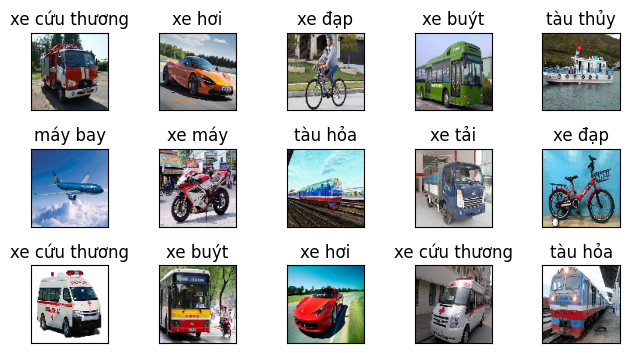

In [ ]:
#test mo hinh

import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

labels = ['xe cứu thương', 
          'xe đạp',
          'xe buýt',
          'xe hơi',
          'xe cứu hỏa',
          'xe máy',
          'máy bay',
          'tàu thủy',
          'tàu hỏa',
          'xe tải']

for i in range(0 , 15):
    plt.subplot(4, 5, i+1)
    plt.tight_layout()
    img = load_img('/content/drive/My Drive/IMAGES/VEHICLE' + str(i+1) + '.jpg', target_size=(100, 100))
    plt.imshow(img)
    img = img_to_array(img)
    img = img.reshape(1, 100,100,3)
    img = img.astype('float32') / 255
    predicted_label = labels[model.predict(img).argmax()]
    plt.title("{}".format(predicted_label))
    plt.xticks([])
    plt.yticks([])
plt.show()